How many days do you wish to search? For one year, it's 365:   365
Output File already exists. Deleting...
Creating new file for Bitcoin as png
Output File already exists. Deleting...
Creating new file for Litecoin as png
Output File already exists. Deleting...
Creating new file for Ethereum as png
            Bitcoin    Litecoin    Ethereum
count    366.000000  366.000000  366.000000
mean    8754.355276   68.311099  196.137636
std     1495.122985   26.992887   47.934863
min     5032.501351   30.280817  110.597898
25%     7543.017662   46.340733  164.884874
50%     8680.942979   59.691648  185.762186
75%     9887.148901   82.433462  224.143967
max    12996.124343  141.822640  337.340958
         Bitcoin   Litecoin    Ethereum
0            NaN        NaN         NaN
1    8091.139346  97.042583  233.514807
2    8034.068169  99.172529  256.822563
3    7609.642328  92.621204  254.235310
4    7322.013308  88.415805  239.448850
..           ...        ...         ...
361  9694.294251  47.356

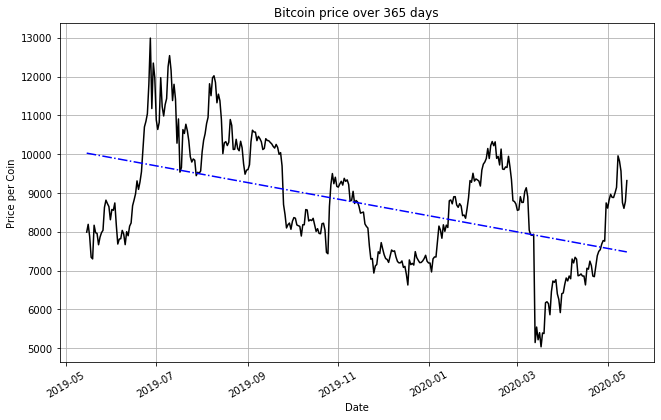

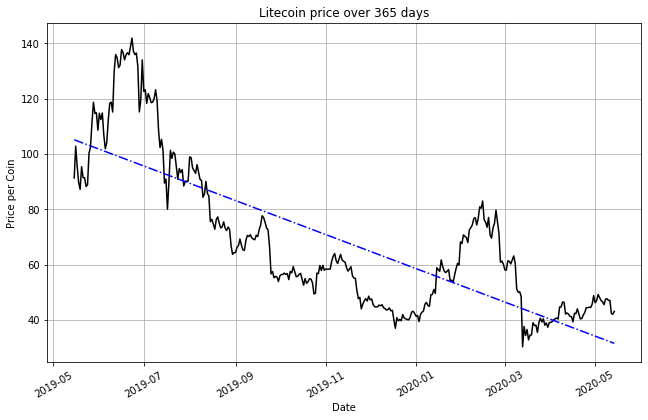

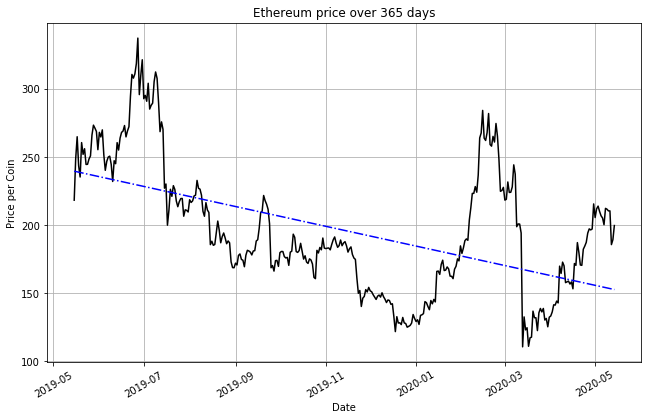

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import requests, json, datetime, sys, os

def dataFigure(date_time, value, date_time_seconds, time_frame, key):
    plt.figure(figsize=(9,6))
    plt.xticks(rotation = 30)
    plt.grid()
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.plot(date_time, value, color = 'black')
    plt.title(f"{key.capitalize()} price over {time_frame} days")
    plt.xlabel('Date')
    plt.ylabel('Price per Coin')
    regression = []
    (slope, intercept, rvalue, pvalue, stderr) = linregress(date_time_seconds, value)
    regress_values = []
    for unix_translate in date_time_seconds:
        regress_values.append(unix_translate * slope + intercept)
    plt.plot(date_time, regress_values,'-.', color = 'Blue')
    try:
        os.remove(f'{key.capitalize()}.png')
        print('Output File already exists. Deleting...') 
        print(f'Creating new file for {key.capitalize()} as png')
        plt.savefig(f'{key.capitalize()}.png')
    except OSError:
        print(f'Creating save file for {key.capitalize()} as png')
        plt.savefig(f'{key.capitalize()}.png')
        pass
    
def checkCoinPrice(url, key):
    response = requests.get(url)
    data_construct = response.json()
    if data_construct == {"error":"Could not find coin with the given id"} or data_construct == {'error': 'invalid vs_currency'}:
        print("There was an issue with variables. Check work and try again.")
    date_time = []   
    value = []
    date_time_seconds = []    
    for row in data_construct['prices']:
        date_time.append(datetime.datetime.utcfromtimestamp(int(row[0]/1000)))
        value.append(row[1])
        date_time_seconds.append(int((row[0]/1000)))
        
    date = []
    time = []
    for convertline in date_time:
        split = str(convertline).split(' ')
        date.append(split[0])
        time.append(split[1])
    data_frame = pd.DataFrame(date, time)
    data_frame = data_frame.reset_index().rename(columns= {0: 'Date', 'index': 'Time'})
    data_frame[key] = value
    return(date_time, value, date_time_seconds, data_frame)
    
def dataFrameFinal(crypto_frame):
    crypto_frame.columns = map(str.capitalize, crypto_frame.columns)
    sum_of_coins = crypto_frame.describe()
    print(sum_of_coins)
    
    
def main():
    quick_keys = {1: 'bitcoin', 2: 'litecoin', 3: 'ethereum'}
    time_frame = int(input("How many days do you wish to search? For one year, it's 365:   "))
    listOfDicts = None
    for coin_type in range(3):
        key = quick_keys[coin_type + 1]
        url = f'https://api.coingecko.com/api/v3/coins/{key}/market_chart?vs_currency=usd&days={time_frame}'
        date_time, value, date_time_seconds, data_frame = checkCoinPrice(url, key)
        if listOfDicts is None:
            listOfDicts = data_frame
        else:
            listOfDicts[key] = data_frame[key]
        
        dataFigure(date_time, value, date_time_seconds, time_frame, key)
    dataFrameFinal(listOfDicts)
    
main()